## Use Case Pre-Processing - Fehlwerte erkennen

In [11]:
# imports
import pandas as pd
import missingno as msno
import numpy as np

In [3]:
# Laden des airbnb-Dataset
df = pd.read_csv("../Datasets/airbnb.csv")

In [4]:
## info über Dataset ausgeben
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [ ]:
# date_first_booking , timestamp_first_active und date_account_created --> object, müsste date sein

In [5]:
# Datumsumformungen
df['date_account_created'] = pd.to_datetime(df.date_account_created)
df['date_first_booking'] = pd.to_datetime(df.date_first_booking)
df['timestamp_first_active'] = pd.to_datetime(df.timestamp_first_active, format = "%Y%m%d%H%M%S")

In [6]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [7]:
## Missing Values / Hidden Missing Values
df.gender.unique() # --> unknown muss ersetzt werden durch nan

array(['-unknown-', 'MALE', 'FEMALE', 'OTHER'], dtype=object)

<AxesSubplot:>

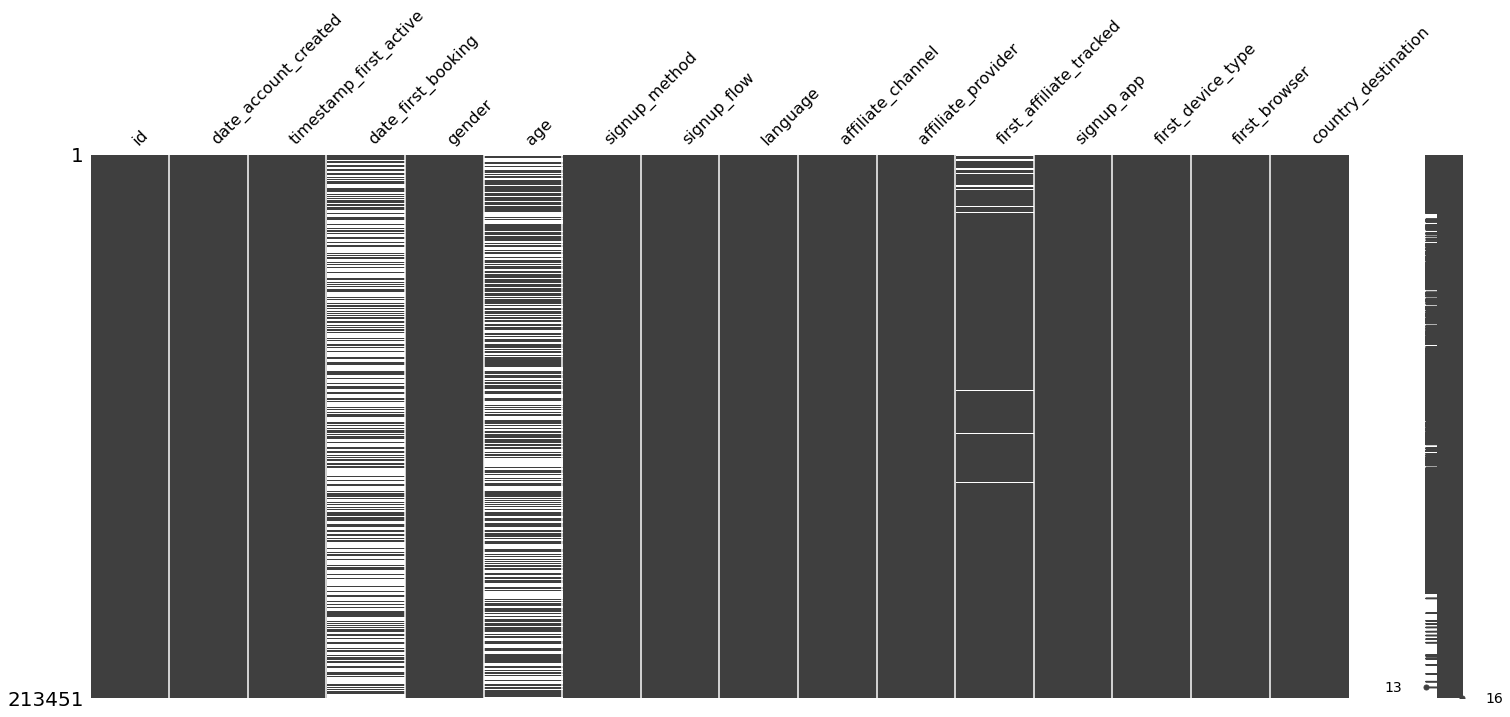

In [9]:
msno.matrix(df) #Nur Offensichtliche Fehlwerte werden erkannt (nan)

In [12]:
df.loc[df.gender=='-unknown-', 'gender'] = np.NaN # replacement

<AxesSubplot:>

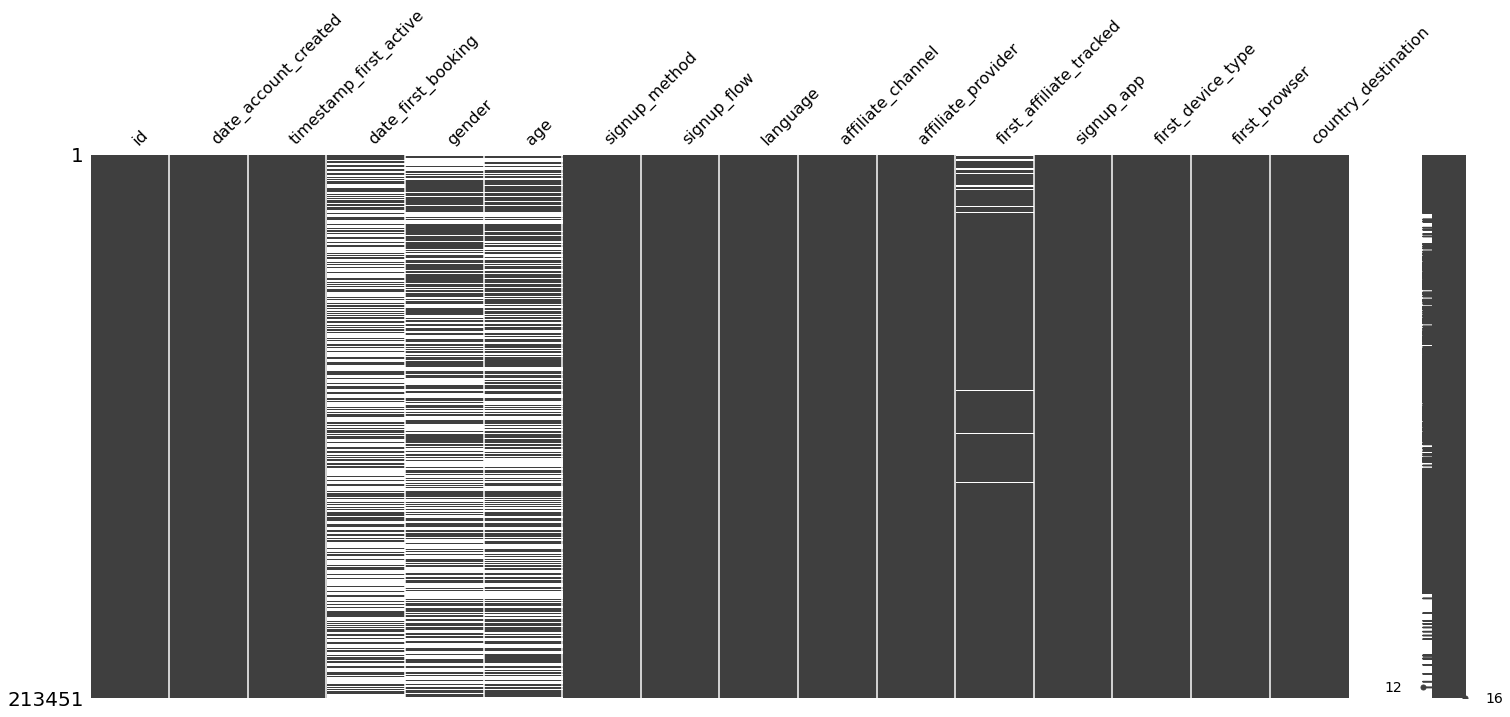

In [13]:
msno.matrix(df) # jetzt wird sichtbar dass auch gender große Mengen an Fehlwerten hat